# Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
customer_df = pd.read_csv("/Users/ignaciolorenzoqueralt/Documents/Ironhack/labs/lab-cleaning-numerical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")

In [3]:
def standardize_headers(df):
    df.columns = df.columns.str.lower().str.replace(' ', '_')
standardize_headers(customer_df)

## 1. Open the categoricals variable we created before.

``` python
categoricals = data.select_dtypes(np.object)
categoricals.head()
```


In [4]:
categoricals = customer_df.select_dtypes(np.object)
categoricals.head(3)

<ipython-input-4-ed78971655f1>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = customer_df.select_dtypes(np.object)


,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize


## 2. Plot all the categorical variables with the proper plot. What can you see?

In [5]:
def plot_categoricals(df):
    categoricals = df.select_dtypes(object)
    for c in categoricals.columns:
        sns.histplot(df[c])
        plt.show()

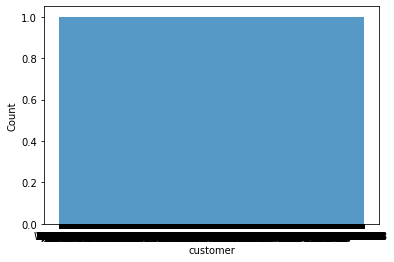

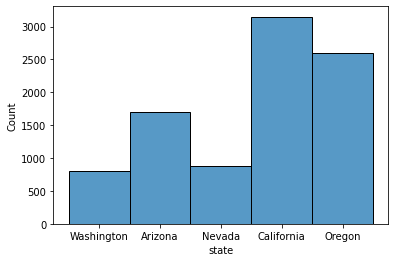

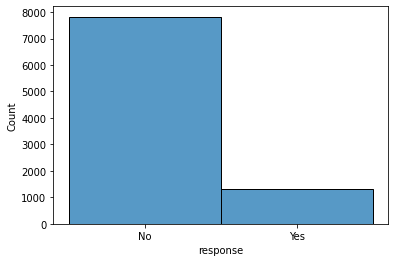

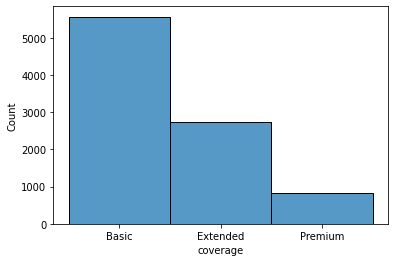

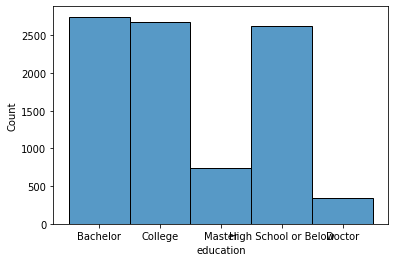

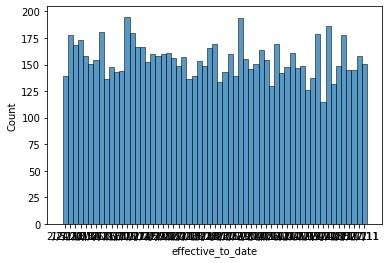

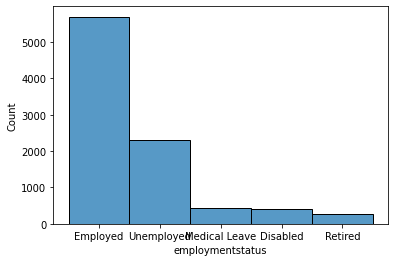

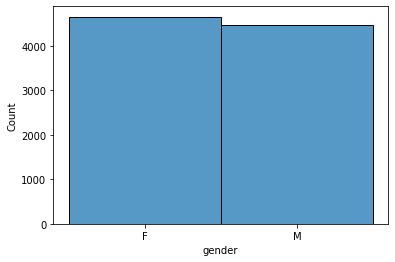

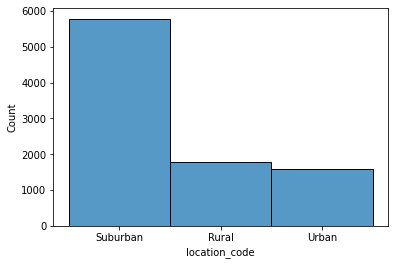

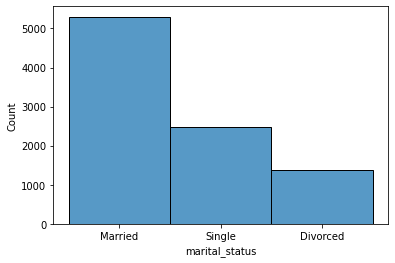

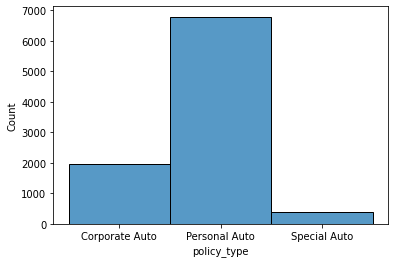

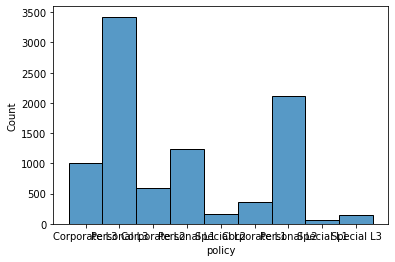

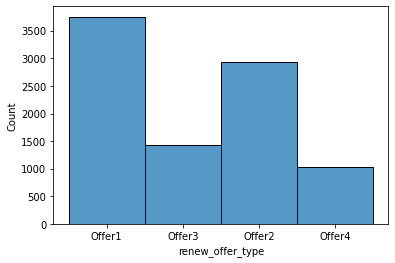

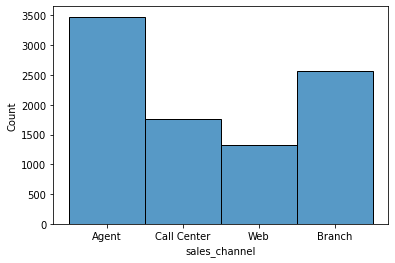

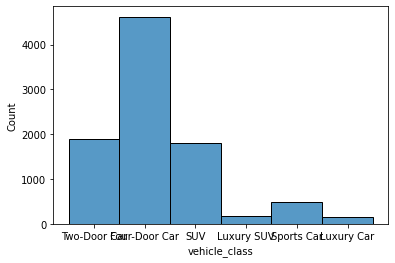

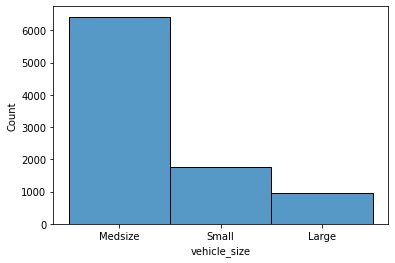

In [6]:
plot_categoricals(customer_df)

- Customer: useless, we should set it as an index.
- State: 2 tiers, Cal and Ore, Washington Arizona and Nevada
- Responses: "No" outnumbers "Yes" --> I don't know the question though...
- Coverage: distribution makes sense, most premium services only purchased by few customers.
- Education: highest levels are the rarest
- Effective To Date: it is a date, probably it is more useful if we convert it to month and year.


## 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [7]:
# 'customer' --> store it as an index
customer_df = customer_df.set_index('customer')

In [8]:
# drop 'response' column as we don't know what is it answering
customer_df = customer_df.drop('response', 1)

In [9]:
customer_df.head(3)

,state,customer_lifetime_value,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


## 4. Plot time variable. Can you extract something from it?

As we have seen in previous steps, the visual representation is useless. We can try to change date format to month and year and see if the resulting histogram is interesting.

In [10]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df.effective_to_date).dt.to_period('m').astype(float)
customer_df.head(3)

TypeError: Cannot cast PeriodArray to dtype float64

I am not being able to group dates by month and year so I can't plot what I think that would be valueable.